### 1. Initialization

In [20]:
# Import the necessary packages
from esda.moran import Moran
from libpysal.weights import Queen, KNN
import seaborn as sns
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import robust_scale
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from clustergram import Clustergram

In [2]:
# Import population grid of respective urban area
popgrid = gpd.read_file('popgridmanchesterlatest.gpkg')

In [3]:
# Selecting variables (columns) for the data exploration phase
cluster_variables = ['population', 'buffer_NDVI_mean', 'buffer_LST_mean', 'buffer_DEM_mean', 'buffer_NightLight_mean', 'dist_to_restaurant',
                    'dist_to_bus_stop', 'dist_to_daily_shops', 'dist_to_business_shops', 'dist_to_greenspace', 'dist_to_train_stations', 'dist_to_gym',
                    'dist_to_schools', 'dist_to_coluni', 'dist_to_place_of_worship', 'dist_to_sport_fields', 'dist_to_hospitals', 'dist_to_fast_food',
                    'dist_to_water_bodies', 'dist_to_doctor_offices', 'dist_to_pharmacies', 'dist_to_gambling', 'land_diversity', 'building_density']

In [4]:
# Checking for the numer of missing values per column
popgrid[cluster_variables].isnull().sum()

population                     0
buffer_NDVI_mean               0
buffer_LST_mean                0
buffer_DEM_mean                0
buffer_NightLight_mean         0
dist_to_restaurant          1369
dist_to_bus_stop            1370
dist_to_daily_shops         1370
dist_to_business_shops      1410
dist_to_greenspace          1469
dist_to_train_stations      2110
dist_to_gym                 1370
dist_to_schools             1370
dist_to_coluni              1370
dist_to_place_of_worship    1370
dist_to_sport_fields        1370
dist_to_hospitals           1370
dist_to_fast_food           1371
dist_to_water_bodies        1476
dist_to_doctor_offices      1369
dist_to_pharmacies          1479
dist_to_gambling            1370
land_diversity                 0
building_density               0
dtype: int64

In [5]:
# Dropping missing values
popgrid = popgrid.dropna()

### 2. Exploring cluster variables

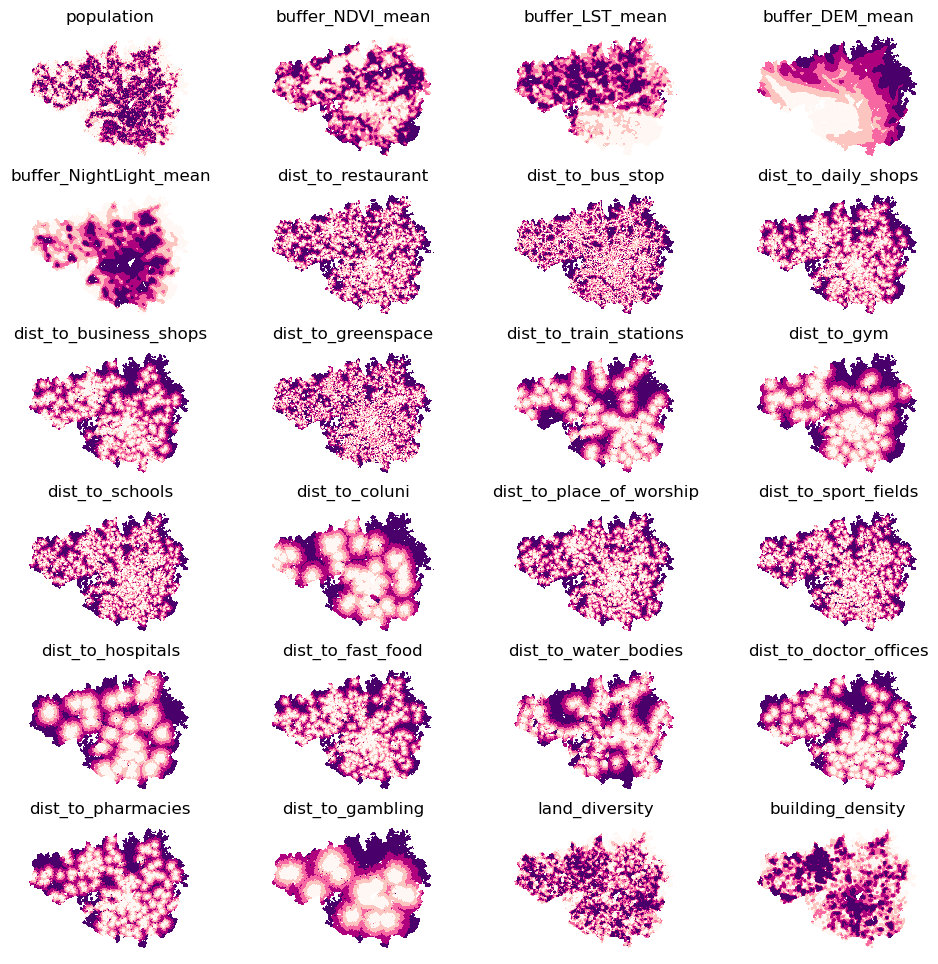

In [6]:
f, axs = plt.subplots(nrows=6, ncols=4, figsize=(12, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()
# Start a loop over all the variables of interest
for i, col in enumerate(cluster_variables):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map
    popgrid.plot(
        column=col,
        ax=ax,
        scheme="Quantiles",
        linewidth=0,
        cmap="RdPu",
    )
    # Remove axis clutter
    ax.set_axis_off()
    # Set the axis title to the name of variable being plotted
    ax.set_title(col)
# Display the figure
plt.show()

### 3. Calculating Moran’s I with queen contiguity

In [7]:
w = Queen.from_dataframe(popgrid)

c:\Users\Gebruiker\anaconda3\envs\ssml\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 70 disconnected components.
 There are 47 islands with ids: 4045, 4095, 5703, 5704, 5882, 14861, 20797, 21388, 27472, 30944, 41978, 54221, 84794, 104668, 116170, 141227, 141246, 149286, 150775, 164918, 174412, 198751, 202227, 206598, 208612, 212541, 217364, 246592, 270530, 277949, 281717, 287501, 290438, 291225, 292695, 293927, 293930, 294158, 295184, 297724, 297795, 297826, 297828, 297829, 297868, 303170, 307810.
  warnings.warn(message)


In [8]:
# Set seed for reproducibility
np.random.seed(123456)

# Calculate Moran's I for each variable
mi_results = [
    Moran(popgrid[variable], w) for variable in cluster_variables
]

# Structure results as a list of tuples
mi_results = [
    (variable, res.I, res.p_sim)
    for variable, res in zip(cluster_variables, mi_results)
]

# Display on table
table = pd.DataFrame(
    mi_results, columns=["Variable", "Moran's I", "P-value"]
).set_index("Variable")
table

('WARNING: ', 4045, ' is an island (no neighbors)')
('WARNING: ', 4095, ' is an island (no neighbors)')
('WARNING: ', 5703, ' is an island (no neighbors)')
('WARNING: ', 5704, ' is an island (no neighbors)')
('WARNING: ', 5882, ' is an island (no neighbors)')
('WARNING: ', 14861, ' is an island (no neighbors)')
('WARNING: ', 20797, ' is an island (no neighbors)')
('WARNING: ', 21388, ' is an island (no neighbors)')
('WARNING: ', 27472, ' is an island (no neighbors)')
('WARNING: ', 30944, ' is an island (no neighbors)')
('WARNING: ', 41978, ' is an island (no neighbors)')
('WARNING: ', 54221, ' is an island (no neighbors)')
('WARNING: ', 84794, ' is an island (no neighbors)')
('WARNING: ', 104668, ' is an island (no neighbors)')
('WARNING: ', 116170, ' is an island (no neighbors)')
('WARNING: ', 141227, ' is an island (no neighbors)')
('WARNING: ', 141246, ' is an island (no neighbors)')
('WARNING: ', 149286, ' is an island (no neighbors)')
('WARNING: ', 150775, ' is an island (no neigh

,Moran's I,P-value
Variable,,
population,0.769731,0.001
buffer_NDVI_mean,0.995683,0.001
buffer_LST_mean,0.997215,0.001
buffer_DEM_mean,0.999345,0.001
buffer_NightLight_mean,0.998112,0.001
dist_to_restaurant,0.891498,0.001
dist_to_bus_stop,0.872945,0.001
dist_to_daily_shops,0.933187,0.001
dist_to_business_shops,0.972210,0.001


### 4. Clustering

Scaling & Clustergram

In [21]:
# Standardizing the dataset using robust scaling
popgrid_scaled = robust_scale(popgrid[cluster_variables])

<AxesSubplot: xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

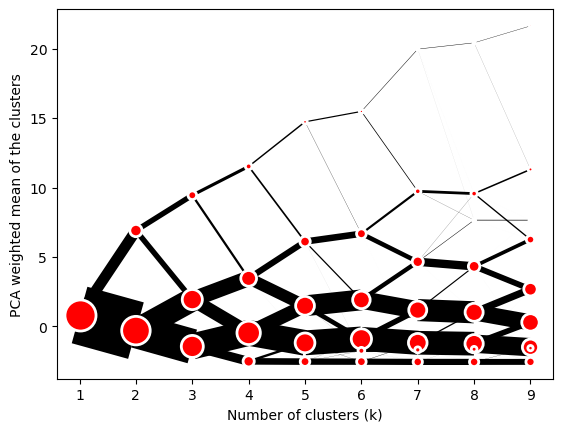

In [22]:
# Creating a clustergram of the dataset
cgram = Clustergram(range(1, 10), n_init=100, verbose=False)
cgram.fit(popgrid_scaled)
cgram.plot()

K-Means Clustering

In [23]:
# Initialize KMeans instance
kmeans = KMeans(n_clusters=5)

In [24]:
# Set the seed for reproducibility
np.random.seed(1234)
# Run K-Means algorithm
kmeans = kmeans.fit(popgrid_scaled)

c:\Users\Gebruiker\anaconda3\envs\ssml\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:
# Print first five labels
kmeans.labels_[:5]

array([0, 0, 3, 3, 2])

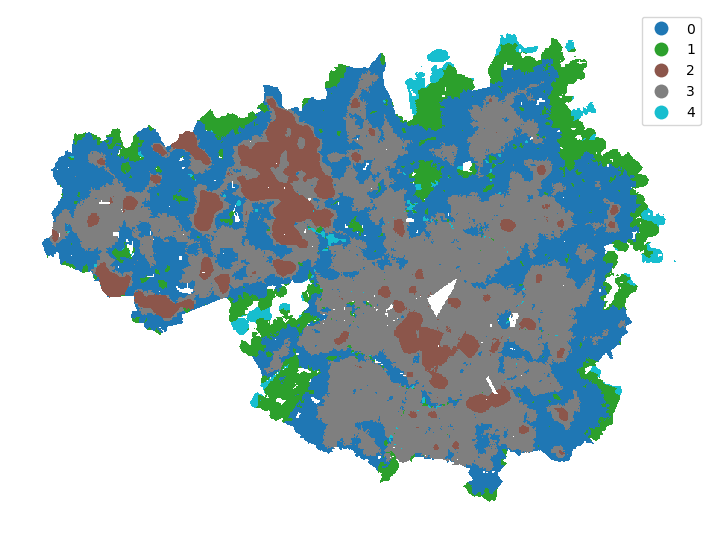

In [26]:
# Assign labels into a column
popgrid["kmeans_clustering_labels"] = kmeans.labels_
# Set up figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including
# a legend and with no boundary lines
popgrid.plot(
    column="kmeans_clustering_labels", categorical=True, legend=True, linewidth=0, ax=ax
)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()

Agglomerative / Hierarchical Clustering

*Model 1: 5 clusters*

In [27]:
# Specify cluster model with spatial constraint
model = AgglomerativeClustering(
    linkage="ward", connectivity=w.sparse, n_clusters=5
)

# Fit algorithm to the data
model.fit(popgrid_scaled)

c:\Users\Gebruiker\anaconda3\envs\ssml\lib\site-packages\sklearn\cluster\_agglomerative.py:282: UserWarning: the number of connected components of the connectivity matrix is 70 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


AgglomerativeClustering(connectivity=<308480x308480 sparse matrix of type '<class 'numpy.float64'>'
	with 2238754 stored elements in Compressed Sparse Row format>,
                        n_clusters=5)

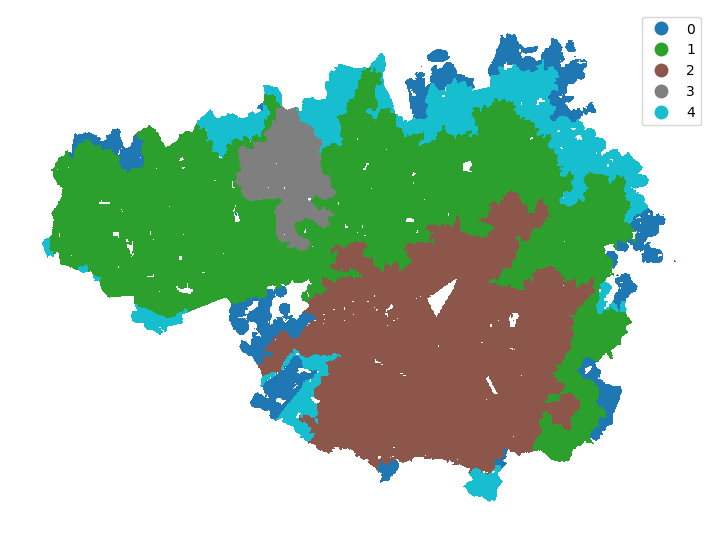

In [28]:
# plotting results
popgrid["agg_clustering_label"] = model.labels_
# Set up figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including a legend and with no boundary lines
popgrid.plot(
    column="agg_clustering_label",
    categorical=True,
    legend=True,
    linewidth=0,
    ax=ax,
)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()

*Model 2: 10 clusters*

In [29]:
# Specify cluster model with spatial constraint
model2 = AgglomerativeClustering(
    linkage="ward", connectivity=w.sparse, n_clusters=10
)

# Fit algorithm to the data
model2.fit(popgrid_scaled)

c:\Users\Gebruiker\anaconda3\envs\ssml\lib\site-packages\sklearn\cluster\_agglomerative.py:282: UserWarning: the number of connected components of the connectivity matrix is 70 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


AgglomerativeClustering(connectivity=<308480x308480 sparse matrix of type '<class 'numpy.float64'>'
	with 2238754 stored elements in Compressed Sparse Row format>,
                        n_clusters=10)

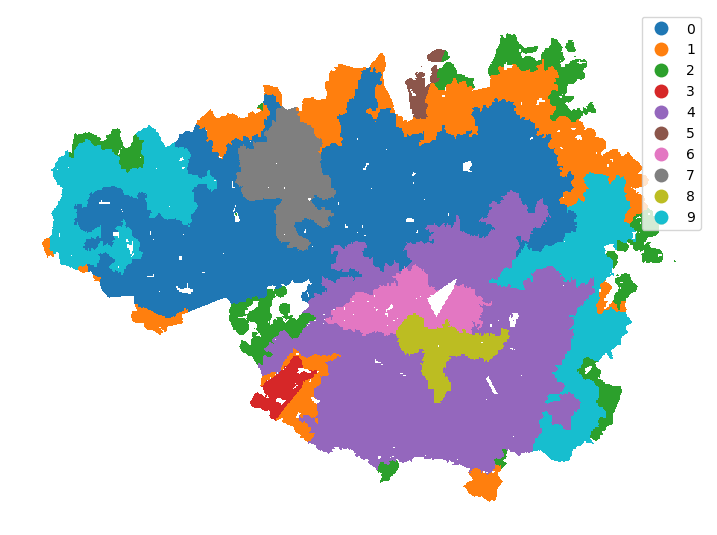

In [30]:
# plotting results
popgrid["agg10_clustering_label"] = model2.labels_
# Set up figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including a legend and with no boundary lines
popgrid.plot(
    column="agg10_clustering_label",
    categorical=True,
    legend=True,
    linewidth=0,
    ax=ax,
)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()